In [48]:
import Bio
import numpy as np
import sys
import os
import networkx as nx
import random as random
from tqdm import tqdm # loading bar
from utils_copy import linear_C, get_cost_2, get_sequence_string, parse_fasta_multiple, create_score_matrix, write_alignments_to_file, linear_backtrack, fill_graph,new_sp_approxi_combi
from utils_copy import convert_to_desired_format_nr_version, compute_cost, my_traversal_simply, extend_alignment_chaos, find_min_span_edges_testing, parse_fasta_multiple_remove_n
import matplotlib.pyplot as plt



In [31]:
score_matrix={'a': {'a': 0, 'c': 5, 'g': 2, 't': 5}, 'c': {'a': 5, 'c': 0, 'g': 5, 't': 2}, 'g': {'a': 2, 'c': 5, 'g': 0, 't': 5}, 't': {'a': 5, 'c': 2, 'g': 5, 't': 0}}
gap_cost=5

seqs=parse_fasta_multiple_remove_n('brca1-testseqs.fasta')[0]
matrix = np.full((len(seqs), len(seqs)), np.nan)
    # Loop over all pairs
for i, seq1 in enumerate(seqs):
    for j, seq2 in enumerate(seqs):
        matrix[i, j] = get_cost_2(linear_C(gap_cost, score_matrix, seq1, seq2,verbose=False))
print(matrix)

[[  0.  18. 384. 457.  38. 463.  50. 464.]
 [ 18.   0. 385. 455.  44. 455.  56. 469.]
 [384. 385.   0. 440. 385. 455. 391. 354.]
 [457. 455. 440.   0. 460. 391. 468. 445.]
 [ 38.  44. 385. 460.   0. 451.  16. 471.]
 [463. 455. 455. 391. 451.   0. 452. 459.]
 [ 50.  56. 391. 468.  16. 452.   0. 467.]
 [464. 469. 354. 445. 471. 459. 467.   0.]]


In [49]:
#The input is a matrix, like the cost matrix from the pairwise alignments
new_format_mat=convert_to_desired_format_nr_version(matrix)
print(new_format_mat)

[['' '18' '0' '1']
 ['' '384' '0' '2']
 ['' '457' '0' '3']
 ['' '38' '0' '4']
 ['' '463' '0' '5']
 ['' '50' '0' '6']
 ['' '464' '0' '7']
 ['' '385' '1' '2']
 ['' '455' '1' '3']
 ['' '44' '1' '4']
 ['' '455' '1' '5']
 ['' '56' '1' '6']
 ['' '469' '1' '7']
 ['' '440' '2' '3']
 ['' '385' '2' '4']
 ['' '455' '2' '5']
 ['' '391' '2' '6']
 ['' '354' '2' '7']
 ['' '460' '3' '4']
 ['' '391' '3' '5']
 ['' '468' '3' '6']
 ['' '445' '3' '7']
 ['' '451' '4' '5']
 ['' '16' '4' '6']
 ['' '471' '4' '7']
 ['' '452' '5' '6']
 ['' '459' '5' '7']
 ['' '467' '6' '7']]


In [33]:
mat_with_min_span_edges=find_min_span_edges_testing(new_format_mat)
print(mat_with_min_span_edges)

[['*' '16' '4' '6']
 ['*' '18' '0' '1']
 ['*' '38' '0' '4']
 ['' '44' '1' '4']
 ['' '50' '0' '6']
 ['' '56' '1' '6']
 ['*' '354' '2' '7']
 ['*' '384' '0' '2']
 ['' '385' '1' '2']
 ['' '385' '2' '4']
 ['' '391' '2' '6']
 ['*' '391' '3' '5']
 ['*' '440' '2' '3']
 ['' '445' '3' '7']
 ['' '451' '4' '5']
 ['' '452' '5' '6']
 ['' '455' '1' '3']
 ['' '455' '1' '5']
 ['' '455' '2' '5']
 ['' '457' '0' '3']
 ['' '459' '5' '7']
 ['' '460' '3' '4']
 ['' '463' '0' '5']
 ['' '464' '0' '7']
 ['' '467' '6' '7']
 ['' '468' '3' '6']
 ['' '469' '1' '7']
 ['' '471' '4' '7']]


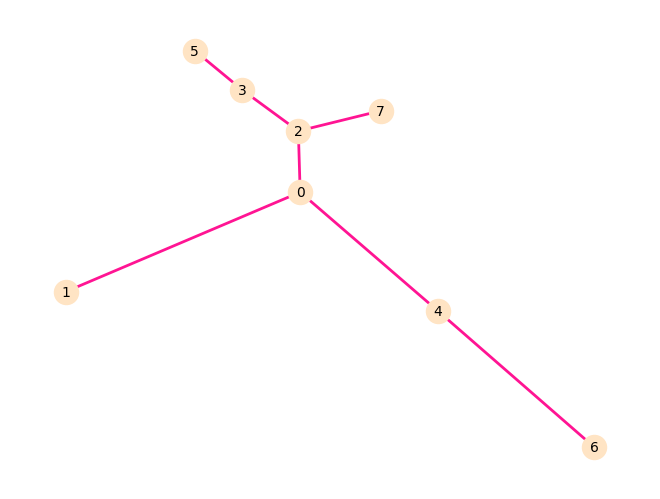

In [34]:
graph=fill_graph(mat_with_min_span_edges,'1')

In [35]:
alignment_pairs,index_dict=my_traversal_simply(graph,'1')
print(alignment_pairs)
print(index_dict)

{'0': '1', '4': '0', '2': '0', '6': '4', '7': '2', '3': '2', '5': '3'}
{'1': '0', '0': '1', '4': '2', '2': '3', '6': '4', '7': '5', '3': '6', '5': '7'}


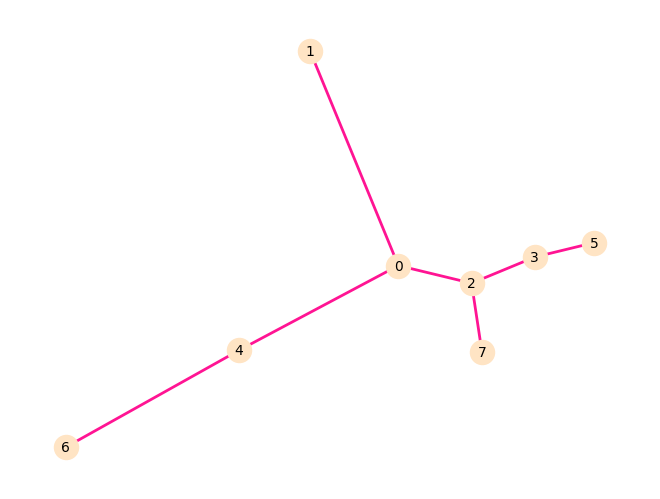

Total cost of MSA:13713


(13713,
 [['-', '-', '-', '-', '-', 'c', '-', '-'],
  ['a', 'a', 'a', 'a', 'g', 'g', 'g', 'g'],
  ['t', 't', 't', 't', 'c', 'c', 't', 't'],
  ['g', 'g', 'g', 'g', 'g', '-', '-', '-'],
  ['g', 'g', 'g', 'g', 'a', 't', 'a', '-'],
  ['a', 'a', 'a', 'a', 'a', 'g', 'c', 't'],
  ['t', 't', 't', 't', '-', '-', '-', '-'],
  ['t', 't', 't', 't', '-', '-', '-', '-'],
  ['t', 't', 't', 't', '-', '-', '-', '-'],
  ['a', 'a', 'a', 'a', 'a', 'g', 'c', 'c'],
  ['t', 't', 't', 't', '-', '-', '-', '-'],
  ['c', 'c', 'c', 'c', '-', '-', '-', '-'],
  ['t', 't', 't', 't', 't', 't', 't', '-'],
  ['g', 'g', 'g', 'g', 'g', 'g', '-', '-'],
  ['c', 'c', 'c', 'c', 't', 'c', 't', 'c'],
  ['t', 't', 'g', 'g', '-', '-', '-', '-'],
  ['g', 'c', 'g', 'g', 'a', 'a', 'g', 'g'],
  ['t', 't', 'a', 'a', 'a', 'a', 'a', 'a'],
  ['t', 't', 't', 't', '-', '-', '-', '-'],
  ['c', 'c', 'c', 'c', 'c', 'c', 't', '-'],
  ['g', 'g', 'a', 'g', 'a', 't', 't', '-'],
  ['c', 'c', 't', 't', 'c', 'c', 't', '-'],
  ['g', 'g', 'g', 'g', '

In [36]:
new_sp_approxi_combi(seqs,score_matrix,gap_cost)